In my other notebook the decision tree did not perform well due to imbalanced data set. I will use the SMOTE technique to address this issue and see if it improves the perfromance. 

https://www.youtube.com/watch?v=GR-OW5asKlk&t=392s&ab_channel=EmmaDing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/rezan/OneDrive/Documents/Fall 2024/Capstone/Illinois_10_years_data.csv")

In [3]:
df.dropna(inplace= True)

In [4]:
int_columns = [
    'Year', 
    'Quarter', 
    'Month', 
    'Day_of_Month', 
    'Day_of_Week', 
    'Scheduled_Departure_Time', 
    'Scheduled_Departure_Time_Minutes',
    'Target'
]

for col in int_columns:
    df[col] = df[col].astype(np.int32)

# Convert continuous numeric features to float32
float_columns = [
    'Departure_Delay_Minutes',
    'Taxi_Out_Time_Minutes',
    'Flight_Distance_Miles',
    'Air_Temperature_Fahrenheit',
    'Dew_Point_Temperature_Fahrenheit',
    'Relative_Humidity_Percent',
    'Wind_Direction_Degrees',
    'Wind_Speed_Knots',
    'Hourly_Precipitation_Inches',
    'Pressure_Altimeter_Inches',
    'Sea_Level_Pressure_Millibar',
    'Visibility_Miles',
    'Sky_Level_1_Altitude_Feet',
    'Apparent_Temperature_Fahrenheit',
    
]

for col in float_columns:
    df[col] = df[col].astype(np.float32)

# Convert categorical features to 'category' dtype
categorical_columns = [
    'Operating_Carrier_Code',
    'Tail_Number',
    'Origin_Airport_ID',
    'Origin_Airport_Code',
    'Origin_State_Name',
    'Destination_Airport_Code',
    'Destination_State_Name',
    'Sky_Cover_Level_1'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [5]:
df = df.drop([ 'Origin_State_Name','Departure_Datetime','Departure_Delay_Minutes'], axis=1)

In [6]:
df_without_categorical = df
df_without_categorical.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Operating_Carrier_Code,Tail_Number,Origin_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,...,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Cover_Level_1,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,2,4,1,2,AA,N359AA,13930.0,ORD,DFW,...,260.0,15.0,0.0,30.0,1014.200012,10.0,SCT,22000.0,40.279999,0
1,2014,2,4,1,2,AA,N3ADAA,13930.0,ORD,LAS,...,260.0,24.0,0.0,30.0,1008.900024,10.0,SCT,2800.0,20.440001,0
2,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,MIA,...,220.0,15.0,0.0,30.0,1004.200012,10.0,SCT,4300.0,55.040001,0
3,2014,2,4,1,2,AA,N3AKAA,13930.0,ORD,SEA,...,250.0,20.0,0.0,30.0,1011.500000,10.0,OVC,2600.0,21.740000,0
4,2014,2,4,1,2,AA,N3ANAA,13930.0,ORD,LAX,...,220.0,15.0,0.0,30.0,1004.200012,10.0,CLR,4700.0,55.259998,0


In [7]:
df_without_categorical = df_without_categorical.drop(columns=df_without_categorical.select_dtypes(include=['category']).columns)

In [8]:
df_without_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969937 entries, 0 to 2969936
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int32  
 1   Quarter                           int32  
 2   Month                             int32  
 3   Day_of_Month                      int32  
 4   Day_of_Week                       int32  
 5   Scheduled_Departure_Time          int32  
 6   Taxi_Out_Time_Minutes             float32
 7   Flight_Distance_Miles             float32
 8   Scheduled_Departure_Time_Minutes  int32  
 9   Air_Temperature_Fahrenheit        float32
 10  Dew_Point_Temperature_Fahrenheit  float32
 11  Relative_Humidity_Percent         float32
 12  Wind_Direction_Degrees            float32
 13  Wind_Speed_Knots                  float32
 14  Hourly_Precipitation_Inches       float32
 15  Pressure_Altimeter_Inches         float32
 16  Sea_Level_Pressure_Millibar       fl

In [9]:
df1= df_without_categorical[df_without_categorical['Month'] == 1]

In [10]:
train_years = [2014, 2015, 2016, 2017, 2018, 2019]
val_years = [2020, 2021, 2022]
test_years = [2023, 2024]

# Ensure the 'Year' column is of integer type
df1['Year'] = df1['Year'].astype(int)

# Create the training set
train_df = df1[df1['Year'].isin(train_years)].reset_index(drop=True)

# Create the validation set
val_df = df1[df1['Year'].isin(val_years)].reset_index(drop=True)

# Create the test set
test_df = df1[df1['Year'].isin(test_years)].reset_index(drop=True)


C:\Users\rezan\AppData\Local\Temp\ipykernel_4284\3451627549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['Year'].astype(int)


In [11]:
train_df['Year'].value_counts()

2018    32116
2019    30290
2015    30099
2017    25477
2016    25412
2014    15129
Name: Year, dtype: int64

In [12]:
train_df.head()

,Year,Quarter,Month,Day_of_Month,Day_of_Week,Scheduled_Departure_Time,Taxi_Out_Time_Minutes,Flight_Distance_Miles,Scheduled_Departure_Time_Minutes,Air_Temperature_Fahrenheit,...,Relative_Humidity_Percent,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit,Target
0,2014,1,1,1,3,1715,28.0,1197.0,1035,21.00,...,77.449997,60.0,14.0,0.020000,30.0,1025.099976,0.625,1200.0,7.26,1
1,2014,1,1,1,3,1100,22.0,4243.0,660,14.25,...,79.980003,350.0,7.0,0.000000,30.0,1025.099976,7.750,1300.0,3.17,1
2,2014,1,1,1,3,1520,24.0,867.0,920,21.00,...,77.449997,70.0,12.0,0.026667,30.0,1025.699951,0.750,1300.0,8.03,1
3,2014,1,1,1,3,1900,19.0,1182.0,1140,21.00,...,77.449997,50.0,11.0,0.027500,30.0,1024.099976,0.750,1400.0,8.45,1
4,2014,1,1,1,3,905,24.0,1197.0,545,12.50,...,79.830002,270.0,8.0,0.001250,30.0,1025.500000,6.000,1200.0,0.34,1


In [13]:
y_train = train_df['Target']


train_df = train_df.drop(columns=['Target'])
train_df.head()


,Year,Quarter,Month,Day_of_Month,Day_of_Week,Scheduled_Departure_Time,Taxi_Out_Time_Minutes,Flight_Distance_Miles,Scheduled_Departure_Time_Minutes,Air_Temperature_Fahrenheit,Dew_Point_Temperature_Fahrenheit,Relative_Humidity_Percent,Wind_Direction_Degrees,Wind_Speed_Knots,Hourly_Precipitation_Inches,Pressure_Altimeter_Inches,Sea_Level_Pressure_Millibar,Visibility_Miles,Sky_Level_1_Altitude_Feet,Apparent_Temperature_Fahrenheit
0,2014,1,1,1,3,1715,28.0,1197.0,1035,21.00,15.00,77.449997,60.0,14.0,0.020000,30.0,1025.099976,0.625,1200.0,7.26
1,2014,1,1,1,3,1100,22.0,4243.0,660,14.25,9.25,79.980003,350.0,7.0,0.000000,30.0,1025.099976,7.750,1300.0,3.17
2,2014,1,1,1,3,1520,24.0,867.0,920,21.00,15.00,77.449997,70.0,12.0,0.026667,30.0,1025.699951,0.750,1300.0,8.03
3,2014,1,1,1,3,1900,19.0,1182.0,1140,21.00,15.00,77.449997,50.0,11.0,0.027500,30.0,1024.099976,0.750,1400.0,8.45
4,2014,1,1,1,3,905,24.0,1197.0,545,12.50,7.50,79.830002,270.0,8.0,0.001250,30.0,1025.500000,6.000,1200.0,0.34


In [14]:
train_df.shape

(158523, 20)

In [15]:
y_val = val_df['Target']


val_df = val_df.drop(columns=['Target'])
val_df.shape

(57380, 20)

In [16]:
y_test = test_df['Target']


test_df = test_df.drop(columns=['Target'])
test_df.shape

(25193, 20)

In [18]:
#!pip install --user imbalanced-learn



In [19]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.12.4
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\users\rezan\appdata\roaming\python\python39\site-packages
Requires: threadpoolctl, scipy, scikit-learn, joblib, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2024)
X_train_resampled, y_train_resampled = smote.fit_resample(train_df, y_train)

<AxesSubplot:xlabel='Class', ylabel='Count'>

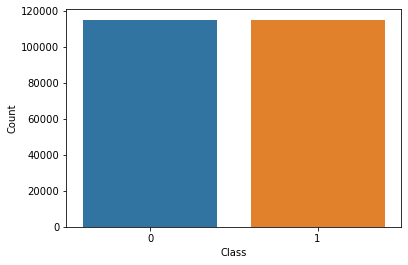

In [25]:
counts = pd.Series(y_train_resampled).value_counts()
class_counts_df = counts.reset_index()
class_counts_df.columns = ['Class', 'Count']

# Plot using Seaborn
sns.barplot(x='Class', y='Count', data=class_counts_df)

In [27]:
from sklearn.tree import DecisionTreeClassifier

jan_clf_3 = DecisionTreeClassifier(random_state = 2024 )
jan_clf_3.fit(X_train_resampled, y_train_resampled)
        

DecisionTreeClassifier(random_state=2024)

In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 50, 100],  
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01],
    'max_depth': [1, 3, 5],           
    'min_samples_split': [2, 3, 4, 5, 6],
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=2024),
                              params,
                              cv=3)

grid_search_cv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2024),
             param_grid={'max_depth': [1, 3, 5],
                         'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                            50, 100],
                         'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [30]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6,
                       min_impurity_decrease=0.01, random_state=2024)

In [31]:
from sklearn.metrics import accuracy_score


y_val_pred = grid_search_cv.best_estimator_.predict(val_df)


accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.60


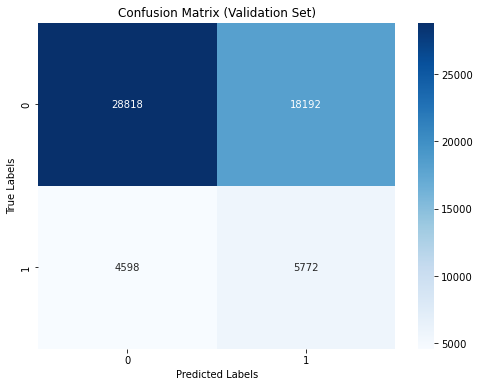

In [33]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_cv.best_estimator_.classes_, yticklabels=grid_search_cv.best_estimator_.classes_)
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [34]:
y_test_pred = grid_search_cv.best_estimator_.predict(test_df)


accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.57


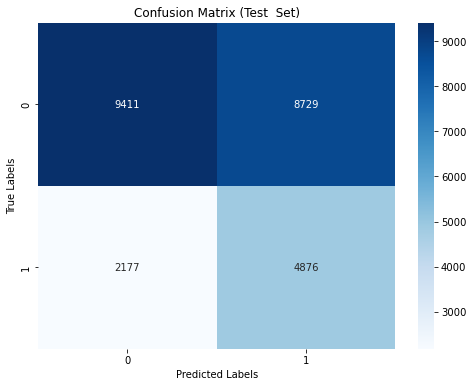

In [36]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_cv.best_estimator_.classes_, yticklabels=grid_search_cv.best_estimator_.classes_)
plt.title('Confusion Matrix (Test  Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63     18140
           1       0.36      0.69      0.47      7053

    accuracy                           0.57     25193
   macro avg       0.59      0.61      0.55     25193
weighted avg       0.69      0.57      0.59     25193



In [38]:
best_tree = grid_search_cv.best_estimator_


[Text(0.6, 0.8333333333333334, 'X[14] <= 0.0\ngini = 0.5\nsamples = 230460\nvalue = [115230, 115230]\nclass = 0'),
 Text(0.4, 0.5, 'X[19] <= 6.999\ngini = 0.485\nsamples = 141621\nvalue = [83101, 58520]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.481\nsamples = 48703\nvalue = [19596, 29107]\nclass = 1'),
 Text(0.6, 0.16666666666666666, 'gini = 0.433\nsamples = 92918\nvalue = [63505, 29413]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.462\nsamples = 88839\nvalue = [32129, 56710]\nclass = 1')]

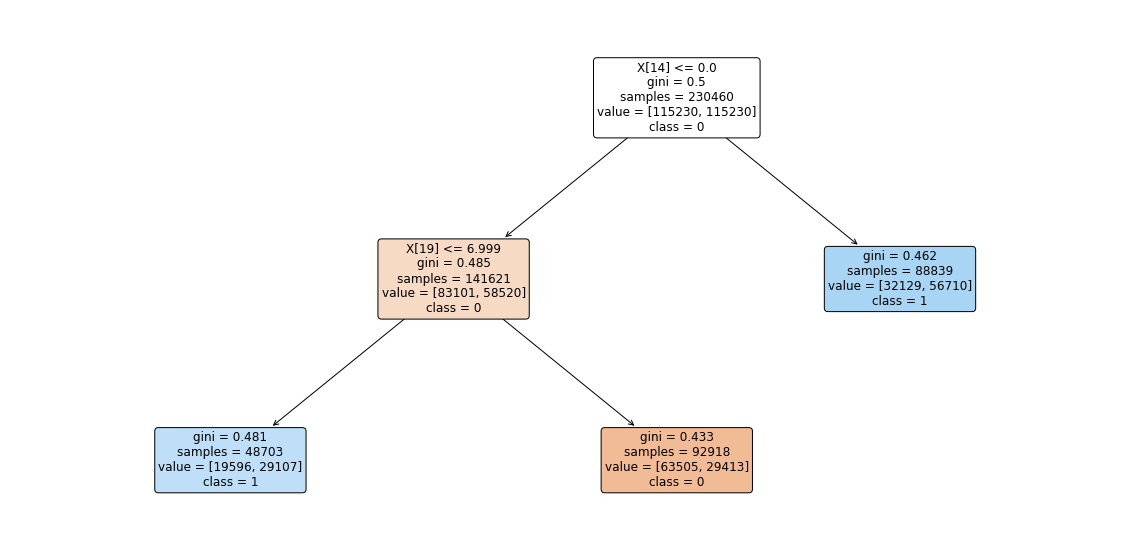

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))  
plot_tree(
    best_tree,
    class_names=[str(cls) for cls in best_tree.classes_],  
    filled=True,  
    rounded=True,  
    fontsize=12    
)

In [45]:
importances = best_tree.feature_importances_


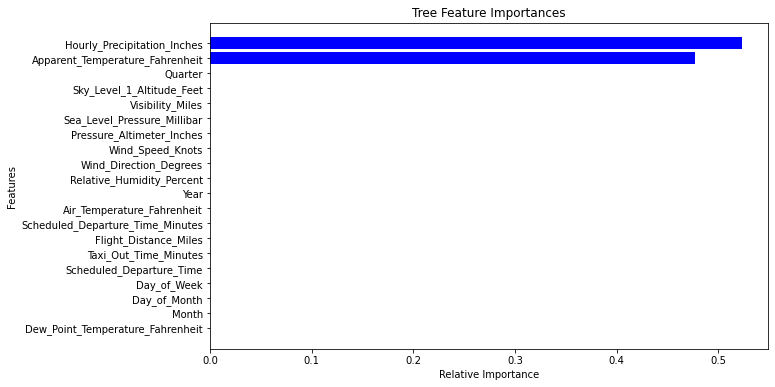

In [48]:



feature_names = test_df.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Tree Feature Importances')
plt.gca().invert_yaxis()  
plt.show()
